<a href="https://colab.research.google.com/github/ulianakazak/Bigutochki/blob/main/MultiNLI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install joypy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [4]:
train = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_train.jsonl', lines = True)
val_mismatched = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_dev_mismatched.jsonl', lines = True)
val_matched = pd.read_json('/content/drive/MyDrive/ snli/multinli_1.0_dev_matched.jsonl', lines = True)
test_mismatched = pd.read_json('/content/drive/MyDrive/ snli/multinli_0.9_test_mismatched_unlabeled.jsonl', lines = True)
test_matched = pd.read_json('/content/drive/MyDrive/ snli/multinli_0.9_test_matched_unlabeled.jsonl', lines = True)
full_data = zip([train, val_matched, test_matched, val_mismatched, test_mismatched], ['train', 'val_matched', 'test_matched', 'val_mismatched', 'test_mismatched'])

In [5]:
train.head(3)

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],government,neutral,31193n,31193,Conceptually cream skimming has two basic dime...,( ( Conceptually ( cream skimming ) ) ( ( has ...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,Product and geography are what make cream skim...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...
1,[entailment],telephone,entailment,101457e,101457,you know during the season and i guess at at y...,( you ( ( know ( during ( ( ( the season ) and...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,You lose the things to the following level if ...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...
2,[entailment],fiction,entailment,134793e,134793,One of our number will carry out your instruct...,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,A member of my team will execute your orders w...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...


# Распределение лейблов и жанров

In [6]:
def gener_label_countplot(data, data_name):
  plot = sns.catplot(x = 'gold_label', col='genre',
                  data=data.sort_values(by =['genre', 'gold_label']),
                  kind="count", height=4, aspect=.8, 
                  palette='winter')
#  plot.set_xticklabels(["contraduction", "neutral", "entailment"])
  plot.fig.suptitle(f'Распределение лейблов по жанрам в {data_name}',  fontsize=18, y=1.05)
  plt.show()

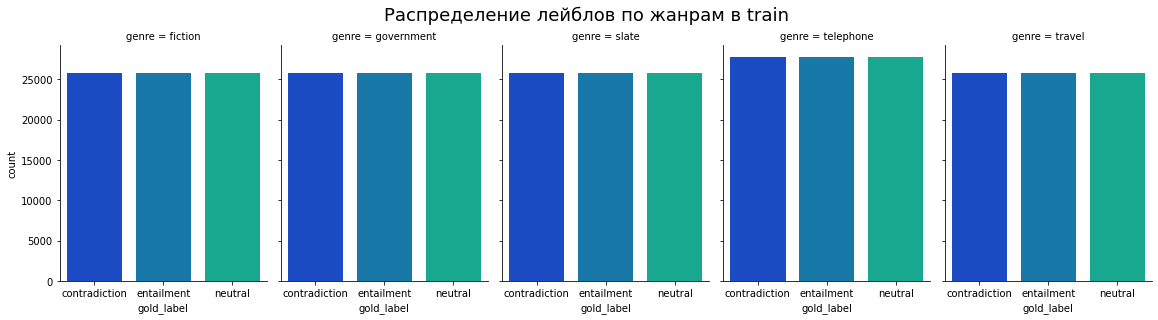

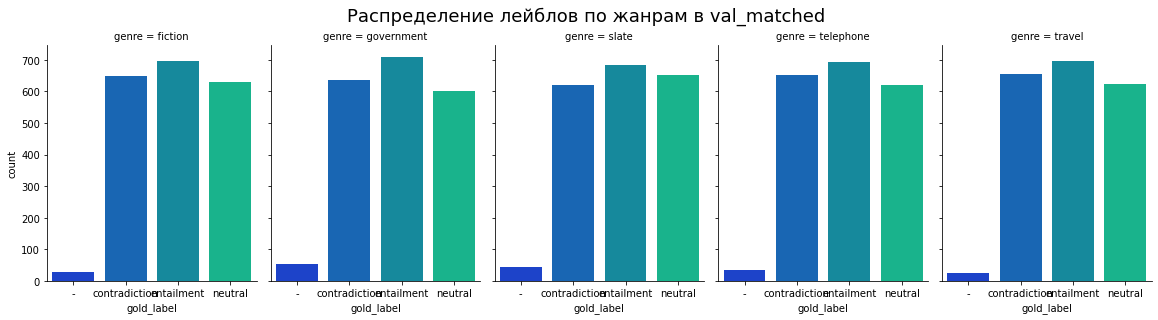

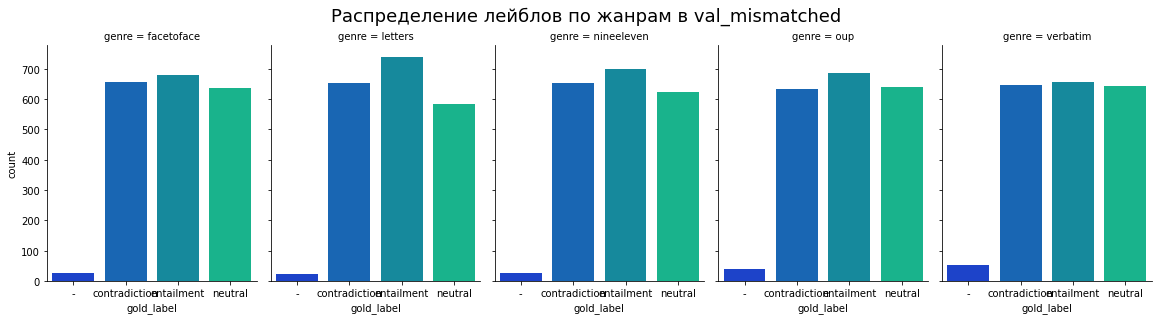

In [7]:
for data, data_name in zip([train, val_matched, val_mismatched], ['train', 'val_matched', 'val_mismatched']):
  gener_label_countplot(data, data_name)

Выборки `train`, `val_matched` и `val_mismatched` все примерно сбалансировны и по лейблам, и по жанрам, кроме одного небольшого класса `-`, который значит, что для данной пары предложений связь не была определена однозначно.

In [8]:
def tokenize_sentenses(data):
  data['s1_tokens'] = data['sentence1'].apply(lambda x: tokenizer.tokenize(x.lower()))
  data['s2_tokens'] = data['sentence2'].apply(lambda x: tokenizer.tokenize(x.lower()))
  return data

In [9]:
for data, data_name in full_data:
  data =  tokenize_sentenses(data)

# Длины предложений

In [10]:
def sentense_len_distribution(data, data_name):

  data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
  data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

  sns.histplot(x = 's1_len', data=data, discrete =True, color='navy', label='Sentenses 1')
  sns.histplot(x = 's2_len', data=data, discrete =True, color='coral', label='Sentenses 2')

  plt.xlim(0,80)
  plt.xlabel('Длина предложения')
  plt.title(f'Распределение длины предложений в {data_name}')
  plt.legend()

  plt.show()

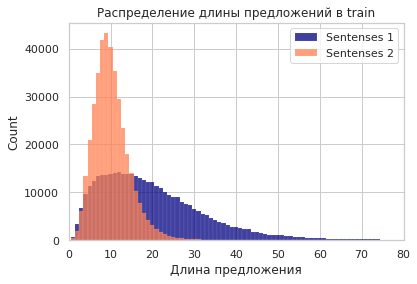

In [33]:
  data = train
  data_name = 'train'
  data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
  data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

  sns.histplot(x = 's1_len', data=data, discrete =True, color='navy', label='Sentenses 1')
  sns.histplot(x = 's2_len', data=data, discrete =True, color='coral', label='Sentenses 2')

  plt.xlim(0,80)
  plt.xlabel('Длина предложения')
  plt.title(f'Распределение длины предложений в {data_name}')
  plt.legend()

  plt.show()

1ые и 2ые предложения имеют разное распределение длин. 1ые предложения в среднем длиннее.

In [11]:
for data, data_name in full_data:
  sentense_len_distribution(data, data_name)
  #почемуто не хочет выводить( когда это дело в функции, нужно делать отдельно для итересующих 

In [12]:
def genre_sentense_len_distribution(data, data_name):

  data = data.sort_values(by='genre')
  data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
  data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

  sns.set_theme(style="whitegrid")
  fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

  sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
  axes[0].set_xlim(0, 60)
  axes[0].set_xlabel('Sentenses 1')

  sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
  axes[1].set_xlim(0, 60)
  axes[1].set_xlabel('Sentenses 2')

  fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18)
  plt.show()

In [13]:
for data, data_name in full_data:
  genre_sentense_len_distribution(val_mismatched,'val_mismatched')

#почемуто не хочет выводить( когда это дело в функции, нужно делать отдельно для итересующих 

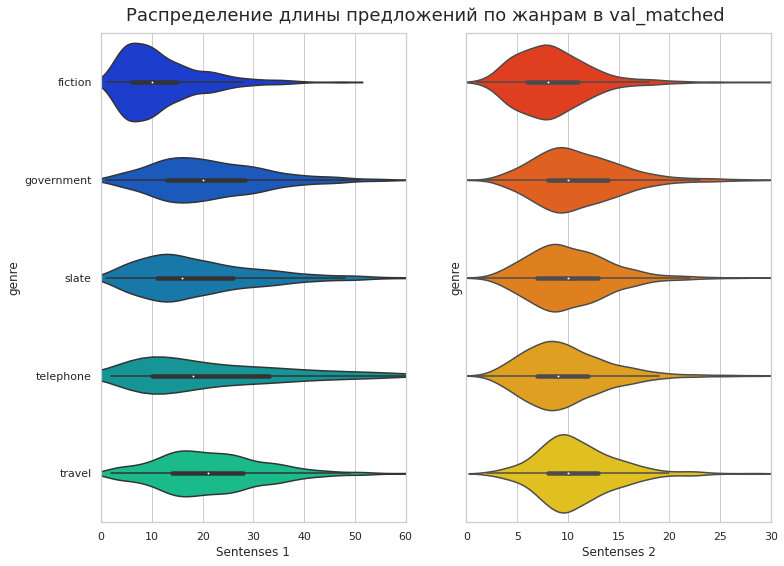

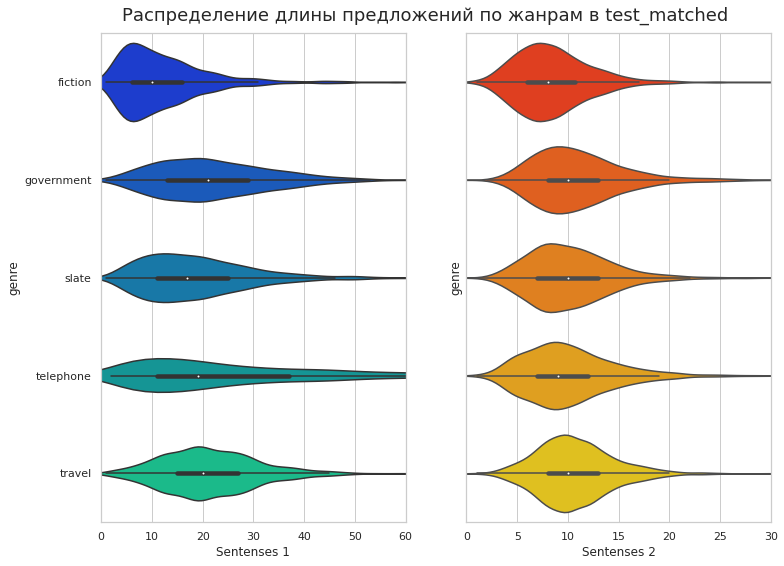

In [37]:
data = val_matched.sort_values(by='genre')
data_name = 'val_matched'

data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0,30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18, y=.92)
plt.show()


data = test_matched.sort_values(by='genre')
data_name = 'test_matched'

data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0, 30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18, y=.92)
plt.show()


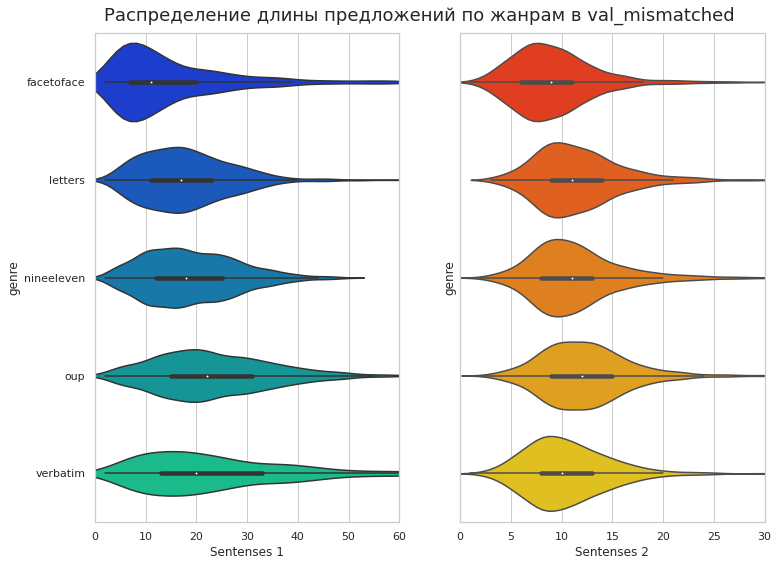

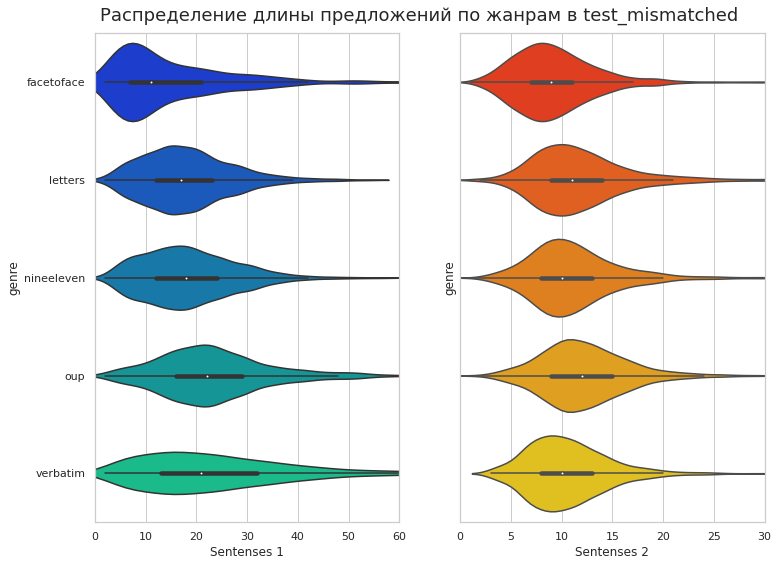

In [36]:
data = val_mismatched.sort_values(by='genre')
data_name = 'val_mismatched'

data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0, 30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18, y=.92)
plt.show()

data = test_mismatched.sort_values(by='genre')
data_name = 'test_mismatched'

data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0, 30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18, y=.92)
plt.show()

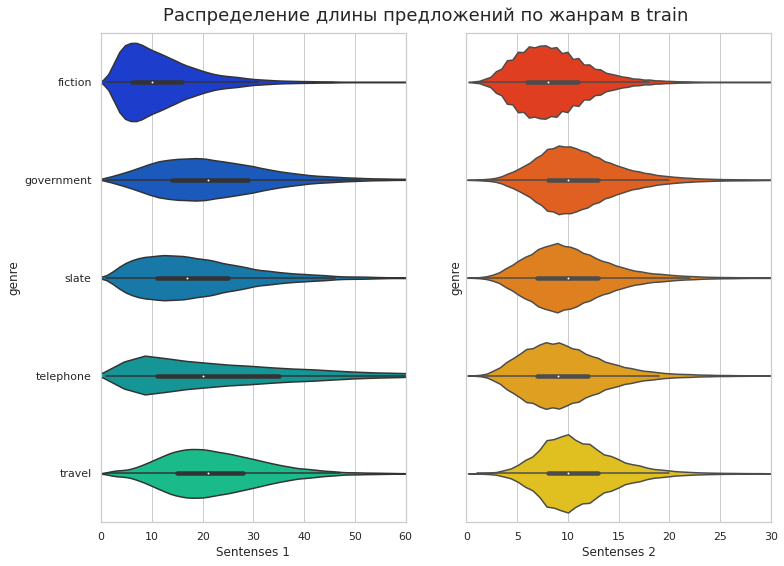

In [38]:
data = train.sort_values(by='genre')
data_name = 'train'

data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='genre', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='genre', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0,30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по жанрам в {data_name}', fontsize=18, y=.92)
plt.show()

In [45]:
train.groupby('genre')['s1_len'].median()

genre
fiction       10
government    21
slate         17
telephone     20
travel        21
Name: s1_len, dtype: int64

Медианная длина 1ого предложения в разных жанрах различается. Може быть хорошим признаком для определения жанра предложения

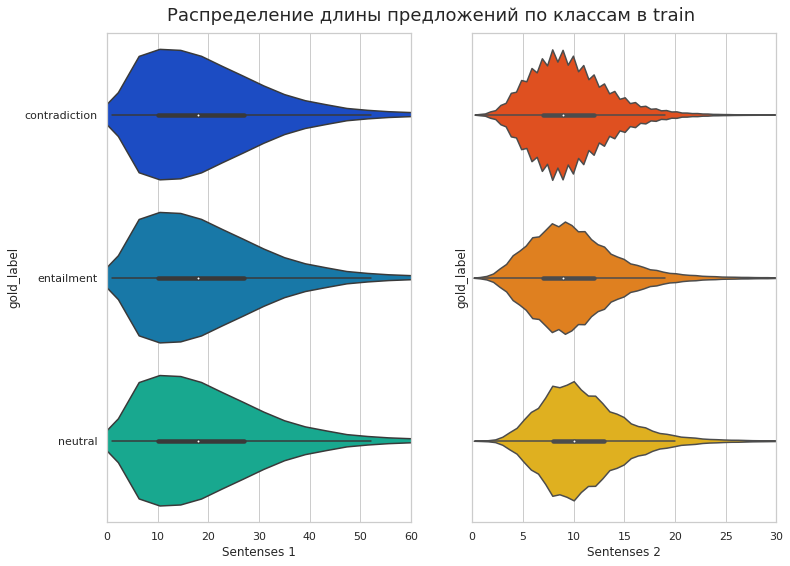

In [39]:
data = train.sort_values(by='gold_label')
data['s1_len'] = data['s1_tokens'].apply(lambda x: len(x))
data['s2_len'] = data['s2_tokens'].apply(lambda x: len(x))

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 9))

sns.violinplot(x='s1_len', y='gold_label', data=data, palette="winter", ax = axes[0])
axes[0].set_xlim(0, 60)
axes[0].set_xlabel('Sentenses 1')

sns.violinplot(x='s2_len', y='gold_label', data=data, palette="autumn", ax = axes[1])
axes[1].set_xlim(0, 30)
axes[1].set_xlabel('Sentenses 2')

fig.suptitle(f'Распределение длины предложений по классам в train', fontsize=18, y=.92)
plt.show()

Зависимости между длинной предложения и типом связи не наблюдается

In [16]:

def lemmatize_sentenses(data):
  data['s1_lemmas'] = data['s1_tokens'].apply(lambda s: list(map(lambda w: lemmatizer.lemmatize(w),s)))
  data['s2_lemmas'] = data['s2_tokens'].apply(lambda s: list(map(lambda w: lemmatizer.lemmatize(w),s)))
  return data

In [17]:
for data, data_name in full_data:
  data = lemmatize_sentenses(data)
  #почему-то не хочет делать( через такую штуку

In [18]:
train = lemmatize_sentenses(train)

In [19]:
val_matched = lemmatize_sentenses(val_matched)

In [20]:
val_matched.head()

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse,s1_tokens,s2_tokens,s1_lemmas,s2_lemmas
0,"[neutral, entailment, neutral, neutral, neutral]",slate,neutral,63735n,63735,The new rights are nice enough,( ( The ( new rights ) ) ( are ( nice enough )...,(ROOT (S (NP (DT The) (JJ new) (NNS rights)) (...,Everyone really likes the newest benefits,( Everyone ( really ( likes ( the ( newest ben...,(ROOT (S (NP (NN Everyone)) (VP (ADVP (RB real...,"[the, new, rights, are, nice, enough]","[everyone, really, likes, the, newest, benefits]","[the, new, right, are, nice, enough]","[everyone, really, like, the, newest, benefit]"
1,"[contradiction, contradiction, contradiction, ...",government,contradiction,91383c,91383,This site includes a list of all award winners...,( ( This site ) ( ( includes ( ( ( ( a list ) ...,(ROOT (S (NP (DT This) (NN site)) (VP (VBZ inc...,The Government Executive articles housed on th...,( ( ( The ( Government ( Executive articles ) ...,(ROOT (S (NP (NP (DT The) (NNP Government) (NN...,"[this, site, includes, a, list, of, all, award...","[the, government, executive, articles, housed,...","[this, site, includes, a, list, of, all, award...","[the, government, executive, article, housed, ..."
2,"[entailment, entailment, entailment, entailmen...",telephone,entailment,755e,755,uh i don't know i i have mixed emotions about ...,( ( ( ( uh ( i ( ( do n't ) ( know ( ( i i ) (...,(ROOT (SINV (S (S (INTJ (UH uh)) (NP (FW i)) (...,"I like him for the most part, but would still ...",( I ( ( ( ( ( ( like him ) ( for ( the ( most ...,(ROOT (S (NP (PRP I)) (VP (VP (VBP like) (NP (...,"[uh, i, don, t, know, i, i, have, mixed, emoti...","[i, like, him, for, the, most, part, but, woul...","[uh, i, don, t, know, i, i, have, mixed, emoti...","[i, like, him, for, the, most, part, but, woul..."
3,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,78013c,78013,yeah i i think my favorite restaurant is alway...,( yeah ( ( i i ) ( think ( ( my ( favorite res...,(ROOT (S (VP (VB yeah) (NP (NP (FW i) (FW i)) ...,My favorite restaurants are always at least a ...,( ( My ( favorite restaurants ) ) ( ( ( ( are ...,(ROOT (S (NP (PRP$ My) (JJ favorite) (NNS rest...,"[yeah, i, i, think, my, favorite, restaurant, ...","[my, favorite, restaurants, are, always, at, l...","[yeah, i, i, think, my, favorite, restaurant, ...","[my, favorite, restaurant, are, always, at, le..."
4,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,96377c,96377,i don't know um do you do a lot of camping,( i ( ( do n't ) ( know ( um ( do ( you ( do (...,(ROOT (S (NP (FW i)) (VP (VBP do) (RB n't) (VP...,I know exactly.,( I ( ( know exactly ) . ) ),(ROOT (S (NP (PRP I)) (VP (VBP know) (ADVP (RB...,"[i, don, t, know, um, do, you, do, a, lot, of,...","[i, know, exactly]","[i, don, t, know, um, do, you, do, a, lot, of,...","[i, know, exactly]"


In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.add('wa')

def count_freq(data, di):
    for ind, row in data.iterrows():
        for lemma in row['s1_lemmas']:
            if lemma not in stopwords:
                di['1'][row['genre']][lemma] += 1
        for lemma in row['s2_lemmas']:
            if lemma not in stopwords:
                di['2'][row['genre']][lemma] += 1

    return di

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import collections

In [25]:
data_freq = {'1': {'fiction': collections.Counter(), 'government': collections.Counter(), 'slate': collections.Counter(), 'telephone': collections.Counter(),  'travel': collections.Counter()}, 
             '2': {'fiction': collections.Counter(), 'government': collections.Counter(), 'slate': collections.Counter(), 'telephone': collections.Counter(),  'travel': collections.Counter()}}
data_freq = count_freq(val_matched, data_freq)

In [26]:
for link in ['fiction','government','slate','telephone','travel']:
    for i in ['1', '2']:
        data_freq[i][link] = data_freq[i][link].most_common(10)

In [27]:
data_words = pd.DataFrame(data_freq)

In [28]:
data_words

,1,2
fiction,"[(one, 123), (said, 117), (jon, 87), (would, 6...","[(man, 69), (jon, 68), (would, 55), (said, 53)..."
government,"[(service, 231), (program, 198), (cost, 177), ...","[(service, 119), (ha, 113), (cost, 90), (progr..."
slate,"[(ha, 156), (new, 132), (time, 108), (would, 1...","[(ha, 135), (people, 64), (clinton, 60), (time..."
telephone,"[(uh, 972), (know, 747), (yeah, 603), (like, 3...","[(think, 93), (like, 87), (one, 84), (time, 77..."
travel,"[(city, 129), (ha, 123), (century, 108), (one,...","[(ha, 126), (city, 72), (many, 70), (people, 6..."


In [29]:
data_freq_1 = {'1': {'contradiction': {}, 'entailment': {}, 'neutral': {}}, 
             '2': {'contradiction': {}, 'entailment': {}, 'neutral': {}}}
for link in ['fiction','government','slate','telephone','travel']:
    for i in ['1', '2']:
        #data_freq[i][link] = data_freq[i][link].most_common(10)
        data_freq_1[i][link] = dict(data_words[i][link])

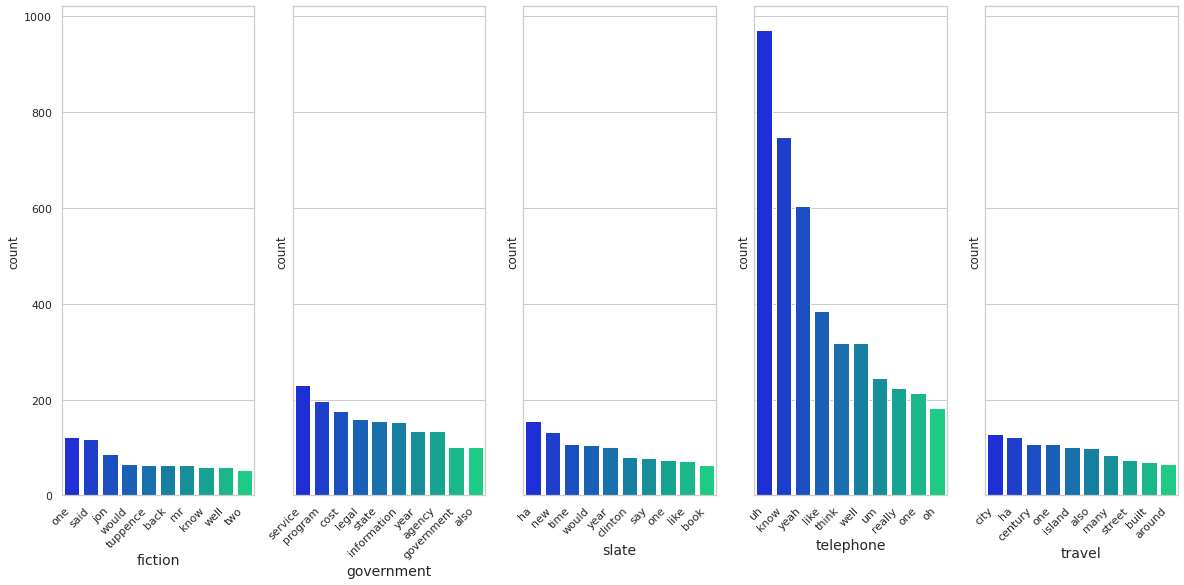

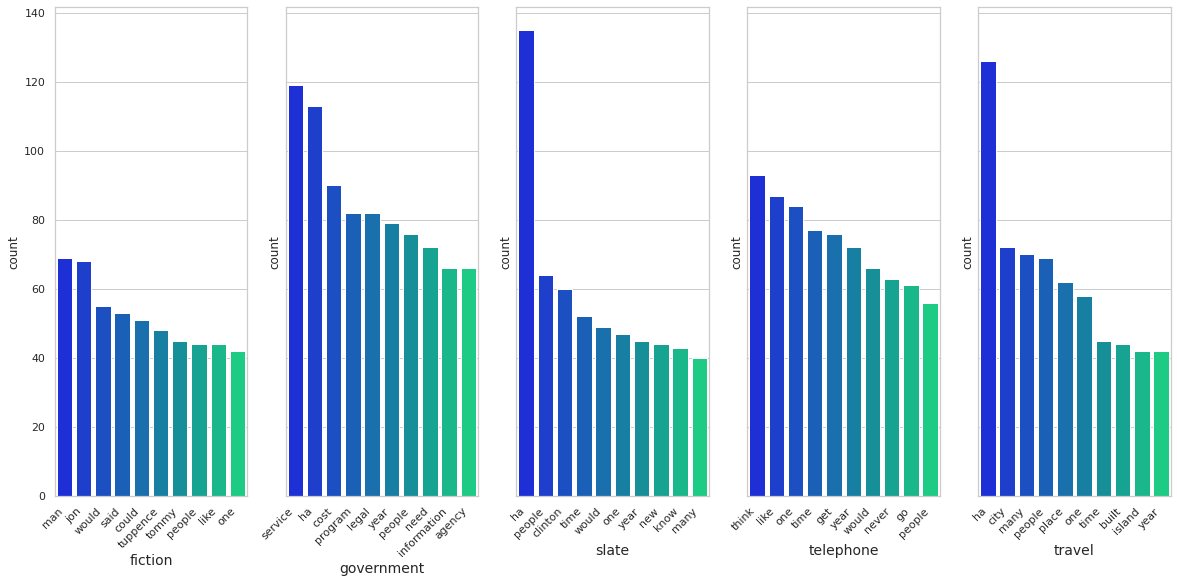

In [30]:
for number in ['1', '2']: 
  w = {'genre': [], 'word': [], 'count': []}
  for genre in ['fiction','government','slate','telephone','travel']:
      data = data_words.loc[genre, number]
      for word in data:
          w['genre'].append(genre)
          w['word'].append(word[0])
          w['count'].append(word[1])

  w = pd.DataFrame(w)

  fig, axes = plt.subplots(1, 5, sharey=True, figsize=(20, 9))

  for i,g in enumerate(['fiction','government','slate','telephone','travel']):
    sns.barplot(x="word", y="count", data=w[w.genre == g], palette='winter', ax=axes[i])
    axes[i].set_xlabel(g,fontsize=14)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
  #ax.set_ylabel("number of words",fontsize=30)
  #ax.tick_params(labelsize=25)
  #plt.title(f'Most frequent words in sentence {number}', fontsize=50)
  plt.show()

Для каждого жанра можно выделить характерные слова. Некоторые слова могут узазвать на несколько жанров, например, слово "people" характрено для всех жанров.

In [ ]:
"""
from joypy import joyplot

plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joyplot(train, column=['s2_len', 's1_len'], by="genre", figsize=(14,10), x_range=[0,60])

plt.title('Распределение длины предложений по жанрам', fontsize=22)
plt.show()"""
